# Laboratorio 2
### Entrega: martes 31 de agosto 2021, 23:59 horas


## Algunas Variables Aleatorias Especiales
En este laboratorio revisaremos algunos tipos de variables aleatorias especiales, definidas por que tienen  distribuciones de probabilidad conocidas. Trabajaremos tanto con v.a. discretas como continuas, y calcularemos y graficaremos las probabilidades teóricas (probabilidaes puntutales, funciones de  densidad y de distribución de probabilidad) y luego las vamos a comparar con datos obtenidos por simulación.

### Estadísticos asociados
1. Posición:  tendencia central y no central
   percentiles, media, moda

2. Dispersión: 
    Varianza, desviación estándar

3. Forma: 
    asimetría, curtosis. 
    
   $$\text{ Asimetría (skewness) }= \frac{E[(X-\mu)^3]}{\sigma^3}$$
   $$\text{ Curtosis }= \frac{E[(X-\mu)^4]}{\sigma^4} - 3$$

In [4]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

from IPython.core.pylabtools import figsize


#### Distribución Bernoulli
Suponga que se realiza un ensayo cuya salida es "éxito" o "falla". La v.a. entonces tiene sólo dos valores posibles: 1 si "éxito" 0 si no. Si $p$ es la probabilidad de éxito, entonces:

$\begin{equation}
\begin{array}{lll} 
P(X=1) & = &p \qquad y \qquad P(X=0) = 1-p \\
P(X = i) & = & p^i (1-p)^{1-i} \,, i=0,1\\
E[X] & = & 1*p + 0*p = p\\
E[X^2] & = & 1*p + 0*p = p\\
Var(X) & = & E[X^2] - (E[X])^2 = p - p^2 = p(1-p)\\
\end{array}
\end{equation}$


#### Distribución Binomial
Suponga que se realizan $N$  ensayos independientes idénticos  Bernoulli  de parámetro $p$. La v.a. X que representa el número $k$ de ensayos existosos entre los $N$ ensayos realizados, se denomina Binomial y cumple:

$\begin{equation}
\begin{array}{lll} 
P(X=k) & = & {N \choose k} p^k (1-p)^{N-k}, \qquad k=0,1,...N \\
E[X] & = & Np\\
Var(X) & = & Np(1-p)\\
Simetria(X) & = & \frac{1-2p}{\sqrt{np(1-p)}}\\
Curtosis(X) & = & \frac{1-6p(1-p)}{np(1-p)}\\
\end{array}
\end{equation}$

### Simulación Variable Aleatoria con Distribución Binomial
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución binomial, y se compara la distribución empírica con la distribución teórica

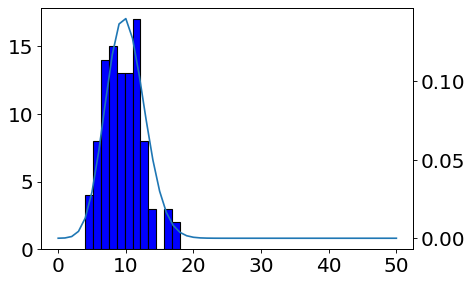

In [5]:
## simulación de size valores v.a. binomial
size=100
n=50
p=0.2
datos_bin =stats.binom.rvs(n=n, p=p, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_bin, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.pmf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


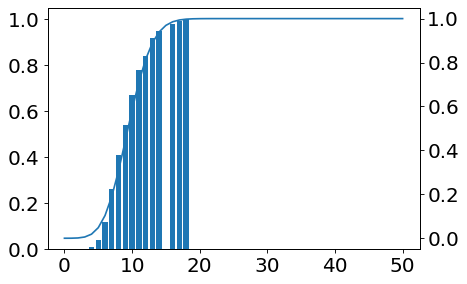

In [6]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_bin = ecdf(datos_bin)
ax.bar(x,cum_bin)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(51))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


In [7]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_bin)/size
var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
asim = stats.skew(datos_bin)
curtos = stats.kurtosis(datos_bin)
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

esperanza empírica: 9.54  teórica:  10.0
varianza empírica: 7.928399999999999  teórica:  8.0
asimetría empírica: 0.6539292112586526 teórica:  0.21213203435596423
curtosis empírico:  0.21177443370168358 teórico:  0.004999999999999977


#### Ejercicio 1: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

In [8]:
#size=10000  #Cantidad de experimentos
#n=40        #numero de eventos certeros  
#p=0.3       #probabildiad de distribución
#cota        #nivel de exigencia para los errores
def simulacion_binomial(p,n,size,cota):
    error_prom=[]
    error_var=[]
    error_asim=[]
    error_curtos=[]
    
    resultado=0
    
    for i in range(1,size):
        datos_bin = stats.binom.rvs(n=n, p=p, size=i); 
        
        promedio = sum(datos_bin)/i
        var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/i
        asim = stats.skew(datos_bin)
        curtos = stats.kurtosis(datos_bin)
        
        prom_t = n*p
        var_t = n*p*(1-p)
        asim_t = (1-2*p)/(math.sqrt(n*p*(1-p)))
        curtos_t = (1-6*p*(1-p))/(n*p*(1-p))
        
        error_prom.append(abs((prom_t - promedio)/prom_t))
        error_var.append(abs((var_t - var_emp)/var_t))
        error_asim.append(abs((asim_t - asim)/asim_t))
        error_curtos.append(abs((curtos_t - curtos)/curtos_t))
        
        if(error_prom[i-1]<cota and
          error_var[i-1]<cota and
          error_asim[i-1]<cota and
          error_curtos[i-1]<cota):
            resultado=i
            break;
    
    print("Se necesitan: ",resultado," simulaciones")
    
    fig, ax = plt.subplots(2, 2,figsize=(17, 17), dpi=30)
    fig.suptitle('Gráficos de Error de estadísgrafos') 
    ax[0,0].plot(error_prom)
    ax[0,0].set_title('Error Esperanza')
    ax[0,0].set(xlabel='iteraciones', ylabel='error')

    ax[0,1].plot(error_var)
    ax[0,1].set_title('Error Varianza')
    ax[0,1].set(xlabel='iteraciones', ylabel='error')

    ax[1,0].plot(error_asim)
    ax[1,0].set_title('Error Asimetría')
    ax[1,0].set(xlabel='iteraciones', ylabel='error')

    ax[1,1].plot(error_curtos)
    ax[1,1].set_title('Error Curtosis')
    ax[1,1].set(xlabel='iteraciones', ylabel='error')

Se necesitan:  1268  simulaciones


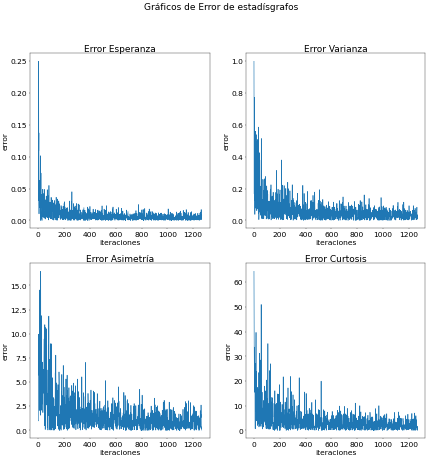

In [9]:
#p=0.3       #probabildiad de distribución
#n=40        #numero de eventos certeros  
#size=10000  #Cantidad de experimentos
#tolerancia        #nivel de exigencia para los errores     
simulacion_binomial(0.4,40,100000,0.1)

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

Se necesitan:  821  simulaciones


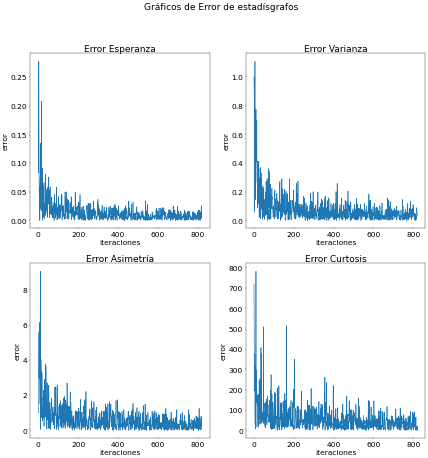

In [10]:
simulacion_binomial(0.2,60,100000,0.1)

Se necesitan:  668  simulaciones


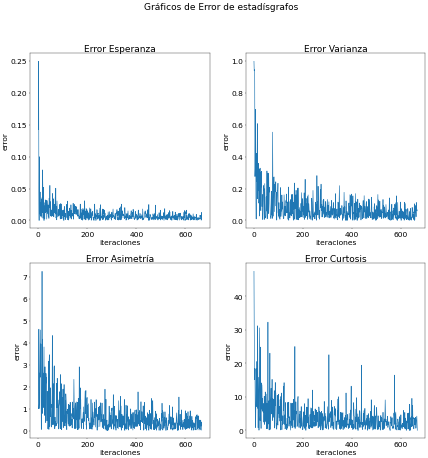

In [12]:
simulacion_binomial(0.7,20,100000,0.1)

In [ ]:
simulacion_binomial(0.4,40,1000,0.1)

Se necesitan:  338  simulaciones


----

#### Ejercicio 2: 
Realice un desarrollo similar al caso de la Distribución Binomial para el caso de una variable aleatoria con Distribución de Probabilidad Poisson


$P(X=x)  =  \frac{\mu e^{-\mu}}{x!}, \qquad x=0,1,...n $

$E[X]  =  \mu$

$Var(X) = \mu$

$Simetria(X) = {\frac{-1}{\sqrt{\mu}}}$

$Curtosis(X) = 3 + \mu^{-1}$




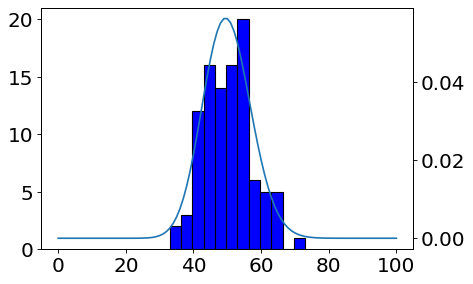

In [6]:
# simulación de size valores v.a. poisson
size=100
mu = 50
datos_poisson =stats.poisson.rvs(mu, size=size) 
#rvs: Random variates
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_poisson, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))

## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.poisson.pmf(k=i, mu=mu))
    #pmf: Probability mass function_probabilidad puntual
ax2.plot(vec,pvec)
plt.draw()

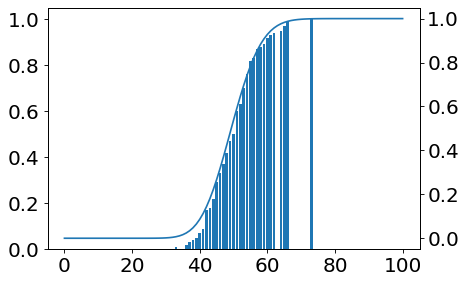

In [7]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_poisson = ecdf(datos_poisson)
ax.bar(x,cum_poisson)

## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.poisson.cdf(k=i, mu=mu))
ax2.plot(vec,pvec)
plt.draw()

In [8]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_poisson)/size
var_emp = sum((datos_poisson - promedio)*(datos_poisson-promedio))/size
asim = stats.skew(datos_poisson)
curtos = stats.kurtosis(datos_poisson)
print('Esperanza empírica:',promedio,'   teórica: ',mu)
print('Varianza empírica:',var_emp,' teórica: ', mu)
print('Asimetría empírica:', asim, 'teórica: ',1/math.sqrt(mu))
print('Curtosis empírico: ', curtos, 'teórico: ',3+(pow(mu,-1)))

Esperanza empírica: 50.16    teórica:  50
Varianza empírica: 52.43440000000003  teórica:  50
Asimetría empírica: 0.38512727797838253 teórica:  0.1414213562373095
Curtosis empírico:  0.2677275046764187 teórico:  3.02


----

#### Distribución Normal o Gaussiana
Sea $X$ v.a. continua, es normal de media $\mu$ y varianza $\sigma^2$ y se denota $\cal{N}(\mu,\sigma^2)$ si su densidad de probabilidad cumple:


$\begin{equation}
\begin{array}{lll} 
f_X(x) & = & \frac{1}{\sqrt{2\pi}\sigma} exp(\frac{-(x-\mu)^2}{2\sigma^2})\qquad, -\infty < x <\infty\\
E[X] &= &\mu\\
Var(X)& =& \sigma^2\\
\end{array}
\end{equation}$

Esta es la distribución de probabilidad mas utilizada. Muchas variables se distribuyen aproximadamente normales (altura, peso, satisfacción en el trabajo, etc.). 

Permite modelar los errores o ruidos.

¿Cómo se verifica que una v.a. sigue una distribución normal?

Test de normalidad de Shapiro-Wilk, Q-Q plot


### Simulación Variable Aleatoria con Distribución Normal
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución normal, y se compara la distribución empírica con la distribución teórica

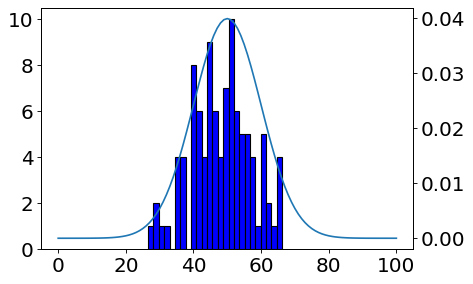

In [15]:
## simulación de size valores v.a. normal
size=100
mu=50
sigma=10
datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_norm, color = 'blue', edgecolor = 'black', bins = int(2*mu/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.pdf(x=i, loc=mu, scale= sigma))
ax2.plot(vec,pvec)
plt.draw()


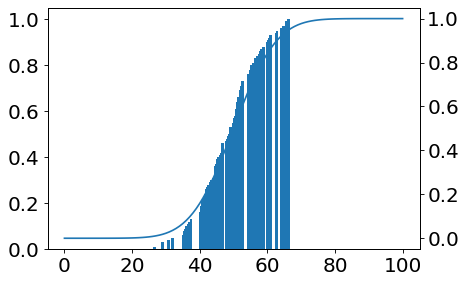

In [16]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_norm = ecdf(datos_norm)
ax.bar(x,cum_norm)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec)
plt.draw()


In [17]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_norm)/size
var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/size
asim = stats.skew(datos_norm)
curtos = stats.kurtosis(datos_norm)
print('esperanza empírica:',promedio,' teórica: ',mu)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)


esperanza empírica: 48.282490897599146  teórica:  50
varianza empírica: 76.95342819520188  teórica:  100
asimetría empírica: -0.10493069937047318 teórica:  0
curtosis empírico:  -0.33654226611189175 teórico:  0


#### Ejercicio 3: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

#### Ejercicio 4: 
Realice un desarrollo similar para el caso de una variable aleatoria continua distribuída chi-cuadrado de $k$ grados de libertad

#### Ejercicio 5 (2 puntos):
Utilice datos de sismicidad del Centro de Sismológico Nacional (http://evtdb.csn.uchile.cl/events), escoja dos  regiones geográficas en Chile (y la región del océano Pacífico contigua), con dimensiones de al menos 5 grados, tanto en longitud como latitud y grafique los histogramas de magnitud y profundidad de los eventos sísmicos significativos disponibles. Calcule parámetros empíricos para cada serie de datos.  Compare y concluya.

### Referencias

https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb
